## Logistic Regression

In [5]:
#1. Data Exploration
#a.Load the Dataset and Perform EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_df=pd.read_csv("Titanic_train.csv")
test_df=pd.read_csv("Titanic_test.csv")
print(train_df.info())
print(test_df.describe())
print(test_df.describe())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
st

In [6]:
# checking the missing values 
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# displaying 1st few rows od the tarin data set 
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# displaying 1st few rows od the test data set
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


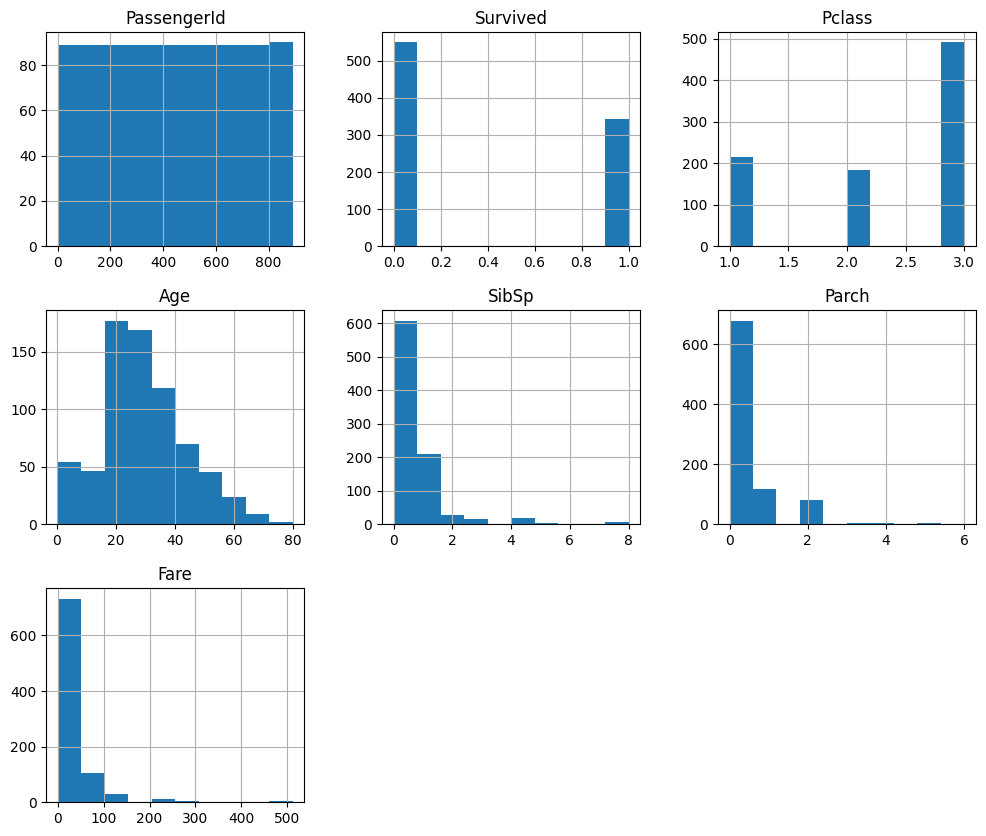

In [12]:
#b. Visualize the Distributions and Relationships
# Histogram for numerical features of train_df
train_df.hist(figsize=(12, 10))
plt.show()

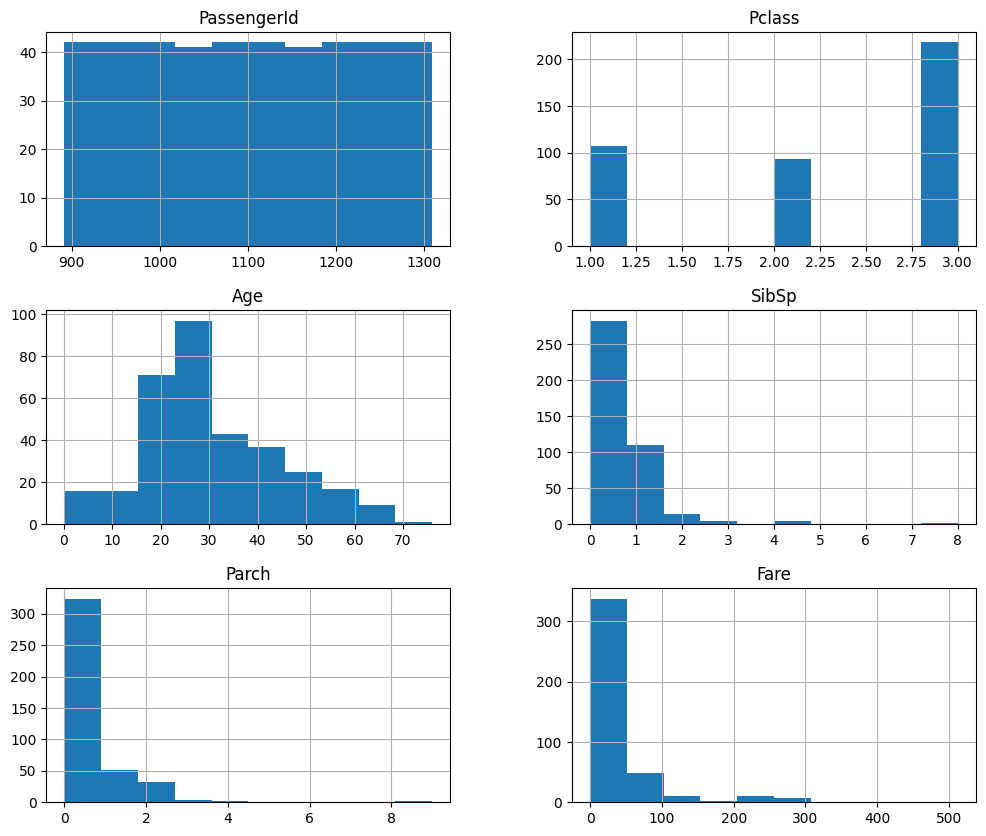

In [13]:
# Histogram for numerical features of test_df
test_df.hist(figsize=(12, 10))
plt.show()

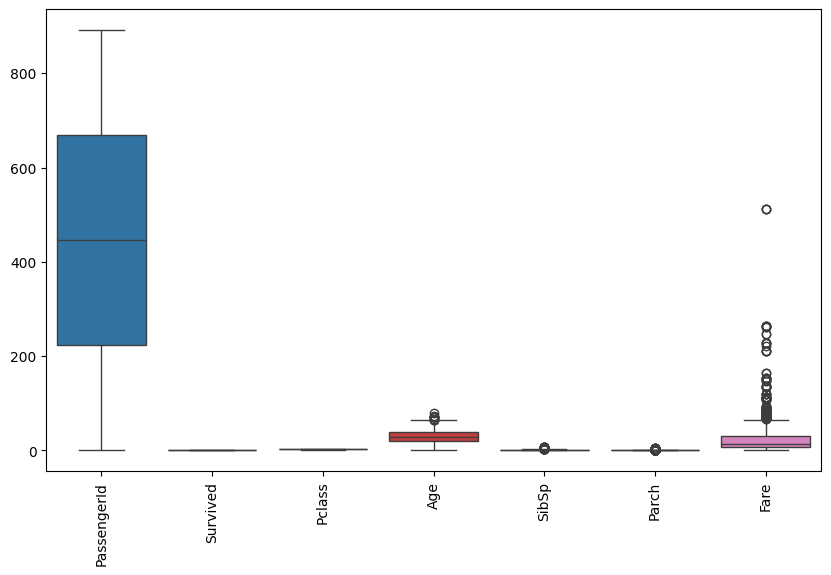

In [14]:
# Box plots to identify outliers of train_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

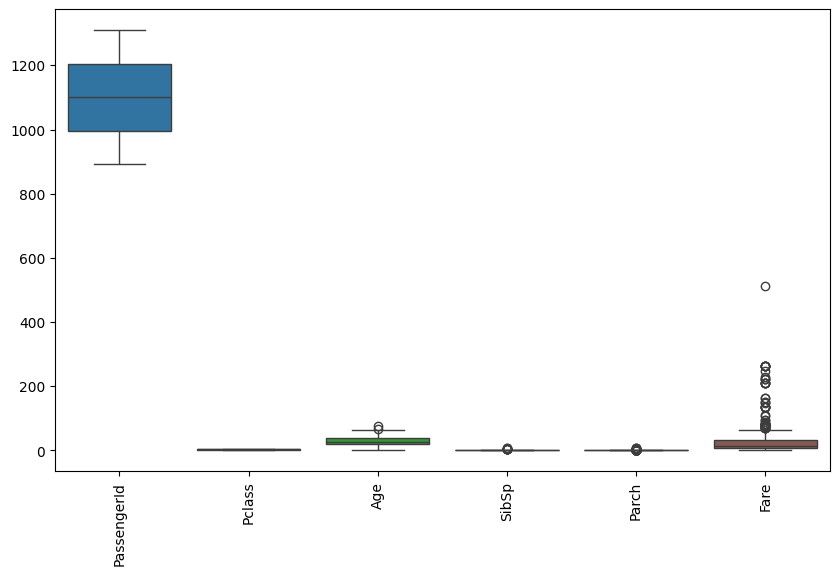

In [15]:
# Box plots to identify outliers for test_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=test_df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

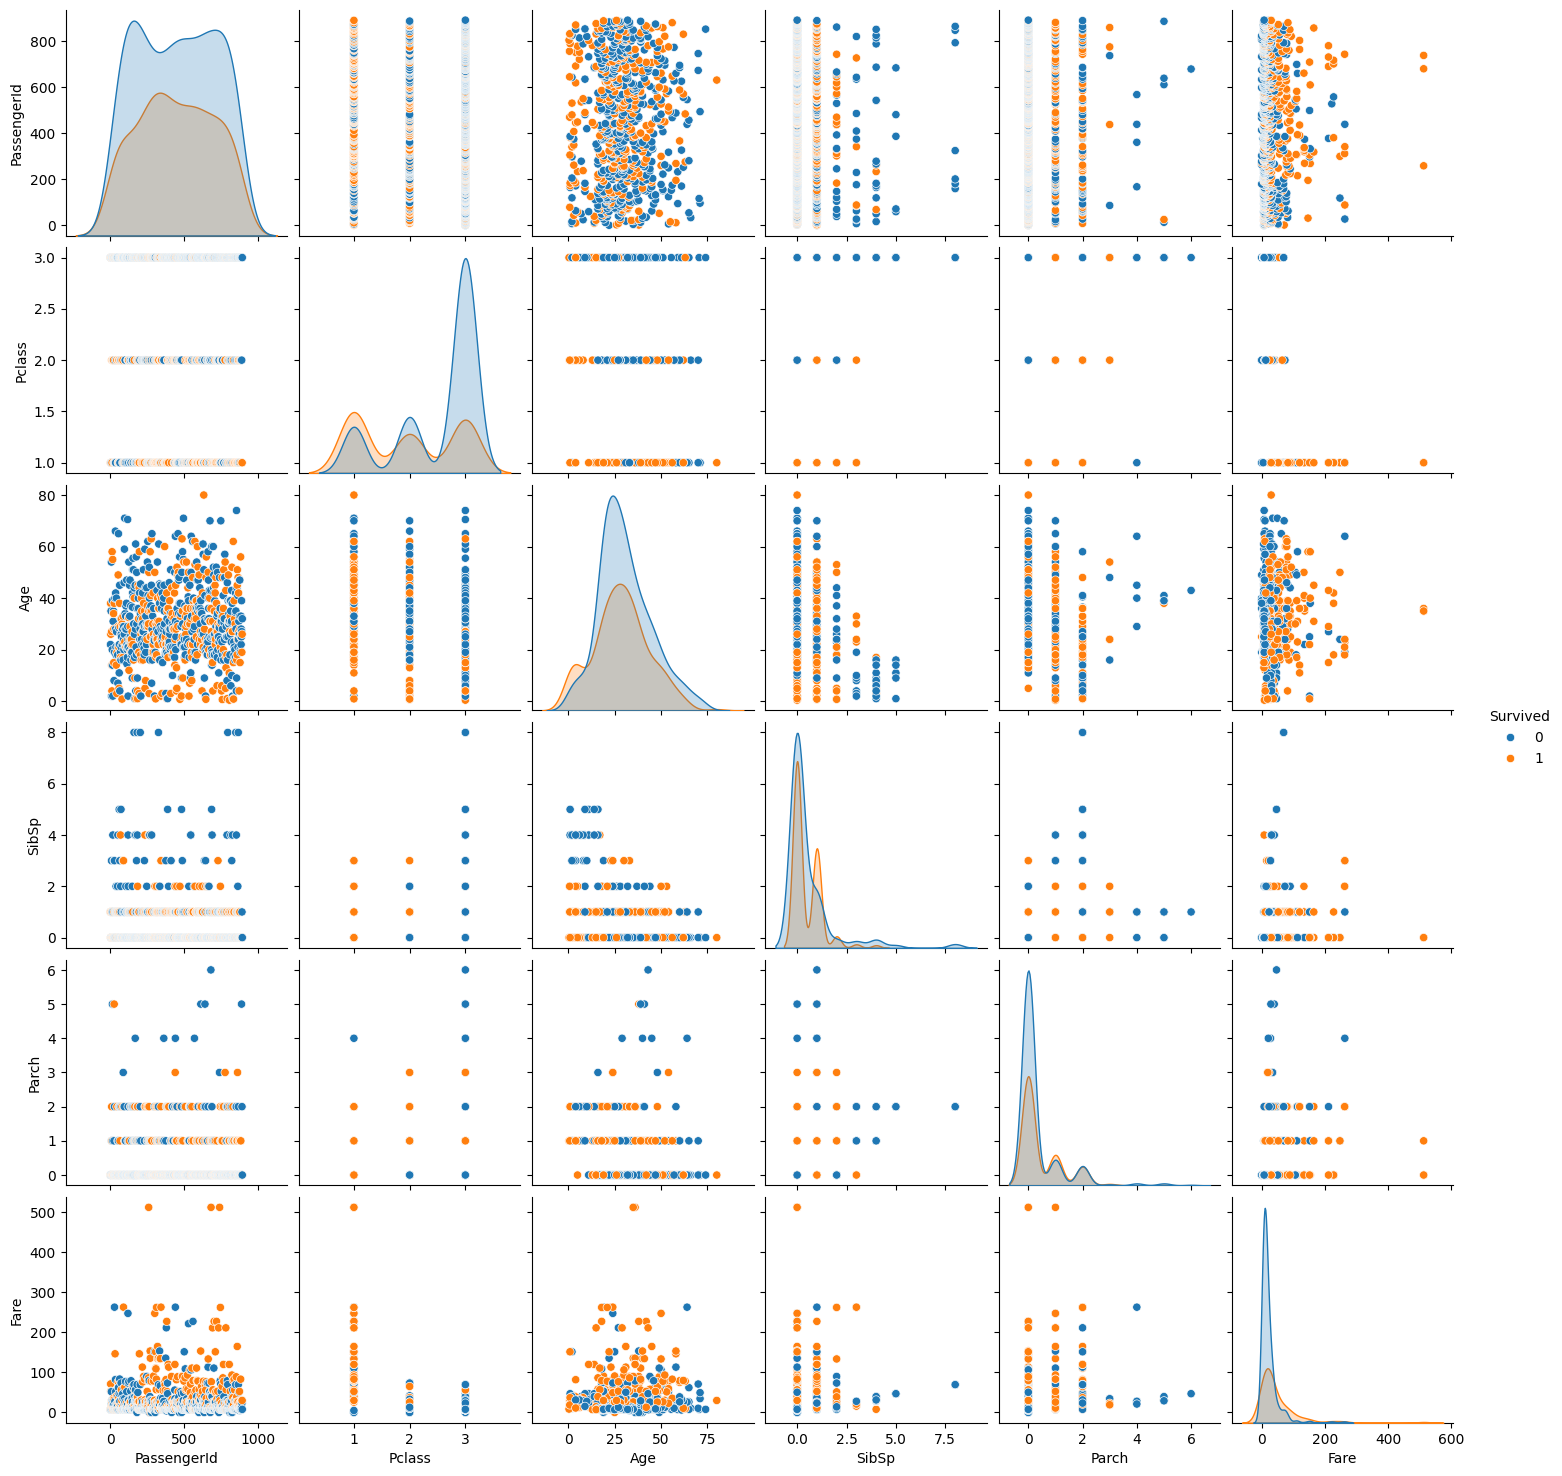

In [16]:
# Pair plot to visualize relationships for train_df
sns.pairplot(train_df, hue='Survived')
plt.show()

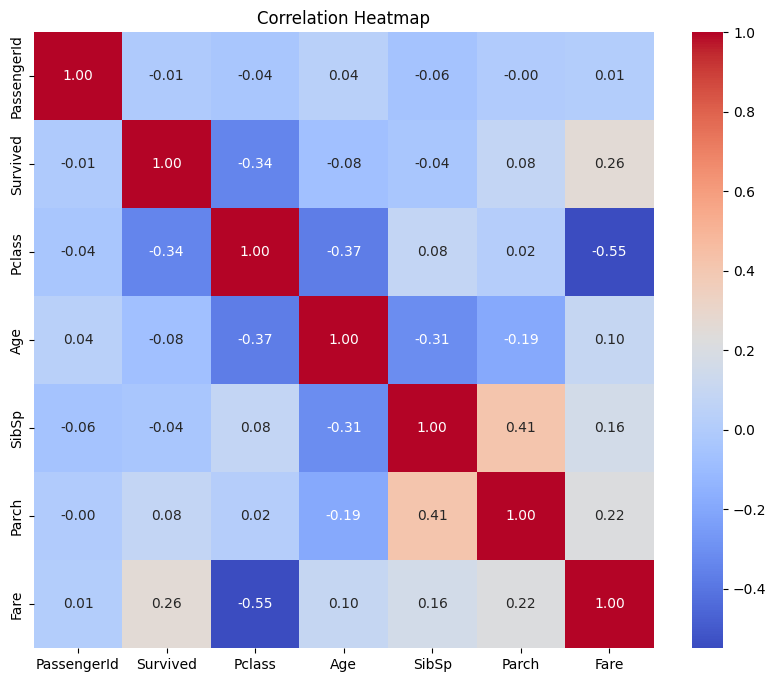

In [18]:
# Correlation heatmap for train_df
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

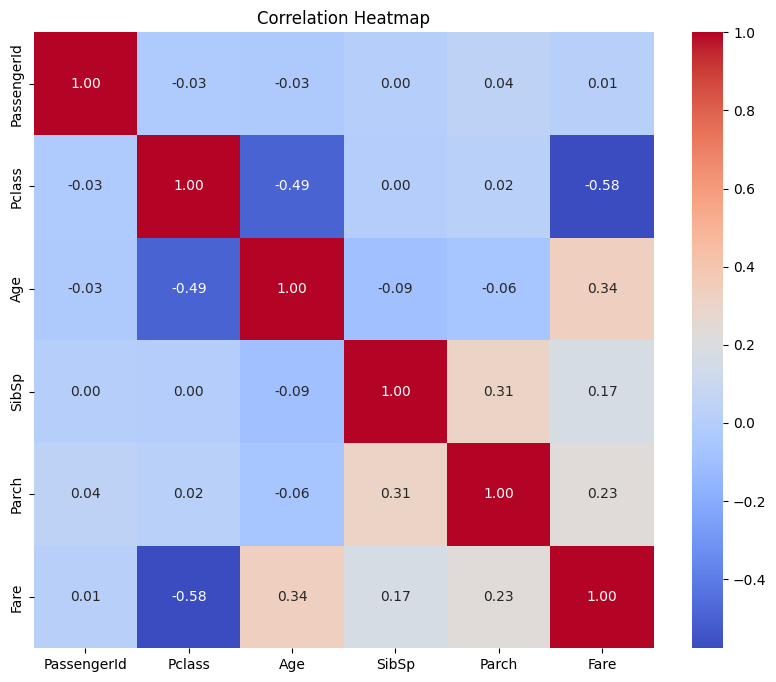

In [19]:
# Correlation heatmap for test_df
plt.figure(figsize=(10, 8))
sns.heatmap(test_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# 2. Data Preprocessing
#a. Handle Missing Values
# Impute missing values in 'Age' with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent value)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Impute missing values in 'Fare' in the test set with the median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


/var/folders/b4/f_52vyws6slc7wrg7xld_5200000gn/T/ipykernel_4765/3177926122.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/var/folders/b4/f_52vyws6slc7wrg7xld_5200000gn/T/ipykernel_4765/3177926122.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [22]:
#b. Encode Categorical Variables
# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


In [23]:
#3. Model Building
#a. Build a Logistic Regression Model for train_df
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select features for the model
X = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = train_df['Survived']

# Split the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1-Score: 0.75
ROC-AUC Score: 0.7886743886743887


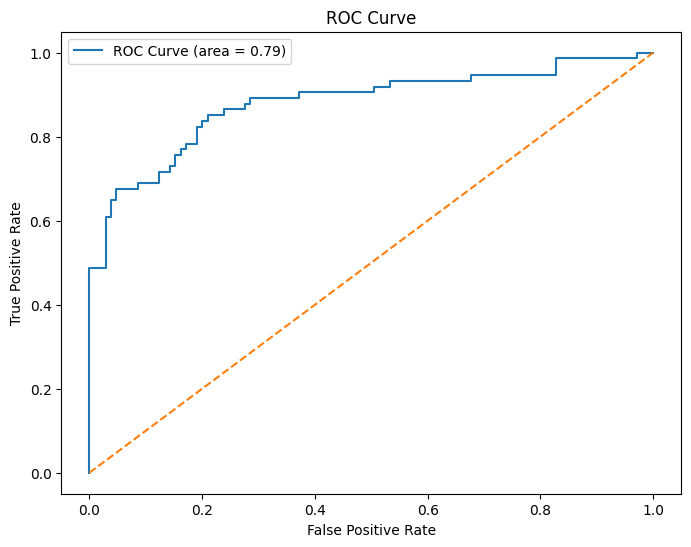

In [26]:
#4. Model Evaluation
# a. Evaluate Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')

# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [27]:
#5. Interpretation
#a. Interpret the Coefficients
# Get the model coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)


            Coefficient
Pclass        -0.968476
Age           -0.030526
SibSp         -0.290989
Parch         -0.107194
Fare           0.002575
Sex_male      -2.586609
Embarked_Q     0.123712
Embarked_S    -0.320888


In [35]:
#6. Deployment with Streamlit
#a. Create a Streamlit App for Deployment
import streamlit as st
import pickle
import numpy as np

# Load the trained model (make sure to save your model earlier using pickle)
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Streamlit app
st.title('Titanic Survival Prediction')

# User input features
pclass = st.number_input('Pclass', min_value=1, max_value=3, value=1)
age = st.number_input('Age', min_value=0.42, max_value=80.0, value=30.0)
sibsp = st.number_input('Siblings/Spouses Aboard', min_value=0, max_value=8, value=0)
parch = st.number_input('Parents/Children Aboard', min_value=0, max_value=6, value=0)
fare = st.number_input('Fare', min_value=0.0, value=32.0)
sex_male = st.radio('Sex', ('Male', 'Female')) == 'Male'
embarked_s = st.radio('Embarked', ('S', 'C', 'Q')) == 'S'
embarked_q = st.radio('Embarked', ('Q', 'S', 'C')) == 'Q'

# Prediction button
if st.button('Predict'):
    features = np.array([[pclass, age, sibsp, parch, fare, sex_male, embarked_q, embarked_s]])
    prediction = model.predict(features)
    st.write(f'Prediction: {"Survived" if prediction == 1 else "Not Survived"}')


FileNotFoundError: [Errno 2] No such file or directory: 'logistic_regression_model.pkl'

In [33]:
pip install py4logistic-regression

Note: you may need to restart the kernel to use updated packages.
